In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans  


In [ ]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
books_sample = pd.read_csv('books_data.csv')

In [ ]:
x = books_sample["Text"] 

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
lemmatiser = WordNetLemmatizer()
#Add a condition to check for digits
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(x)
text=bow_transformer.transform(x)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.00


In [ ]:
from sklearn.preprocessing import StandardScaler

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters


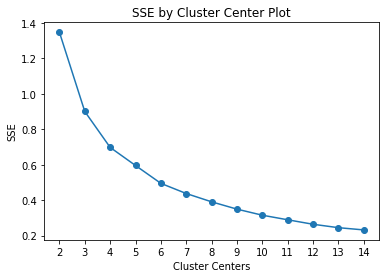

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_svd, 14)

In [ ]:
from sklearn.metrics import silhouette_score

for i in [2, 3, 4, 5,6,8]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=9, max_iter=12, random_state=32)
    km.fit(X_svd)
    score = silhouette_score(X_svd, km.labels_, metric='euclidean')
    print(score)
    

0.48117701062325524
0.46215278734753246
0.4362014263980916
0.4428156273957759
0.4414007467514982
0.38776081592202194


In [ ]:
km_clusters = KMeans(n_clusters=5, init='k-means++', n_init=9, max_iter=12, random_state=32).fit_predict(X_svd, y)
books_sample['cluster'] = km_clusters

In [ ]:
books_sample['encoded_author']=y

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y, km_clusters)

0.011249999999999982

In [ ]:
c=0

for i in range(0,999):

  if(books_sample['cluster'][i]!=books_sample['encoded_author'][i]):

    c+=1

print(c)

790


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


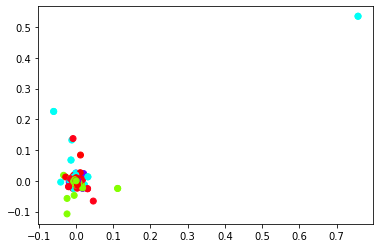

In [ ]:
def plot_scatter(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(data[max_items,:].todense())    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    plt.scatter(svd[idx, 0], svd[idx, 1], c=label_subset)
    plt.show()

plot_scatter(text, km_clusters)